# Students language proficiency

Sklearn can be very useful for data analysis in Python/Jupyter

## Information obtained from Kaggle

#### Project done by Miguel Estrada

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

In [20]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
data_studies = pd.read_csv('english_learning_dataset.csv')
data_studies.tail()

,age,education_level,native_language,learning_goal,activity_type,time_spent_seconds,feedback_given,avg_sentence_length,grammar_error_rate,lexical_density,cohesion_score,syntax_complexity,language_proficiency
995,37,2,1,0,2,466,0,8.258122,0.266986,0.633235,0.637620,0.662999,0
996,32,2,0,0,0,140,0,11.117705,0.059479,0.676114,0.653451,0.322999,1
997,20,0,0,2,1,158,1,12.812510,0.388046,0.705953,0.645696,0.551222,1
998,16,2,3,2,2,355,0,13.300418,0.308837,0.571601,0.815207,0.422370,1
999,28,2,1,2,0,37,0,10.474313,0.195705,0.216896,0.778594,0.710387,1


In [30]:
data_studies.describe()

,age,education_level,native_language,learning_goal,activity_type,time_spent_seconds,feedback_given,avg_sentence_length,grammar_error_rate,lexical_density,cohesion_score,syntax_complexity,language_proficiency
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,26.699000,0.991000,1.943000,0.988000,1.544000,315.538000,0.478000,11.952116,0.284161,0.510158,0.597426,0.511419,0.778000
std,7.847801,0.818284,1.452536,0.834597,1.102397,161.052334,0.499766,2.934655,0.168452,0.187666,0.099832,0.154530,0.432323
min,14.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,3.286607,0.004920,0.045706,0.314048,-0.109690,0.000000
25%,20.000000,0.000000,1.000000,0.000000,1.000000,178.750000,0.000000,9.987300,0.152361,0.369060,0.529953,0.407135,1.000000
50%,27.000000,1.000000,2.000000,1.000000,2.000000,314.500000,0.000000,11.757519,0.257582,0.515525,0.598464,0.514926,1.000000
75%,34.000000,2.000000,3.000000,2.000000,3.000000,456.250000,1.000000,13.994907,0.398401,0.653643,0.668039,0.614268,1.000000
max,39.000000,2.000000,4.000000,2.000000,3.000000,599.000000,1.000000,20.306677,0.878563,0.951134,0.892616,0.995146,2.000000


In [31]:
data_studies.isna().sum()

age                     0
education_level         0
native_language         0
learning_goal           0
activity_type           0
time_spent_seconds      0
feedback_given          0
avg_sentence_length     0
grammar_error_rate      0
lexical_density         0
cohesion_score          0
syntax_complexity       0
language_proficiency    0
dtype: int64

In [32]:
data_studies['language_proficiency'].value_counts()

language_proficiency
1    764
0    229
2      7
Name: count, dtype: int64

# Analysis with all the variables
Trying to predict the language proficiency of a student based on other variables

In [33]:
X = data_studies.drop('language_proficiency', axis=1)
Y = data_studies['language_proficiency']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [35]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [36]:
classifier = LogisticRegression(fit_intercept=True)
classifier.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [37]:
predictions = classifier.predict(x_test)

<Axes: >

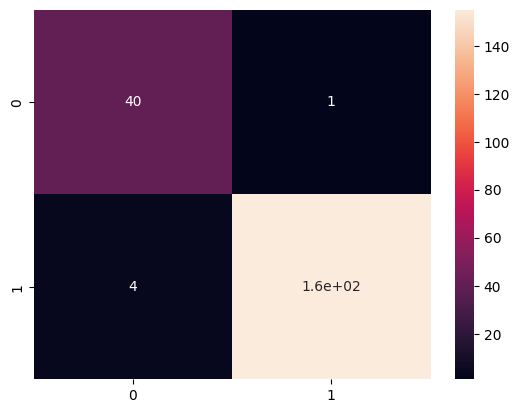

In [38]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)

In [39]:
## Accuracy of the model
accuracy_score(y_test, predictions)

0.975

#### Strong correlation among the data